### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [334]:
data = pd.read_csv('/Users/uday.kemburu/Downloads/assignment_5_1_starter/data/coupons.csv')

In [336]:
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [338]:
data.info()
# 26 Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [344]:
# Investigate by examining the row and column data

# Count the total number of duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_count}")
print("-" * 50)

# Examine Unique column values to see if data needs to resolve structural errors
for column in data.columns:
    unique_values = data[column].unique()
    print(f"\nColumn: {column}")
    print(f"Number of unique values: {len(unique_values)}")
    print("Unique values:")
    
    # Print the first 10 unique values
    if len(unique_values) > 10:
        print(unique_values[:10], "... (truncated)")
    else:
        print(unique_values)
    
    print("-" * 50)  # Print a separator line


# null columns and null counts
null_columns = data.columns[data.isnull().any()].tolist()
null_counts = data[null_columns].isnull().sum()

# print columns with null values along with the count of null values
print("Columns with null values and their null counts:")
print("-" * 50)
for column, count in null_counts.items():
    print(f"{column}: {count}")
print("-" * 50)   
#percentage of null values per columns out of total rows
print("Columns with null values %:")
print("-" * 50)
total_rows = len(data)
for column, count in null_counts.items():
    percentage = (count / total_rows) * 100
    print(f"{column}: {count} null values ({percentage:.2f}% of total)")

Total number of duplicate rows: 74
--------------------------------------------------

Column: destination
Number of unique values: 3
Unique values:
['No Urgent Place' 'Home' 'Work']
--------------------------------------------------

Column: passanger
Number of unique values: 4
Unique values:
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
--------------------------------------------------

Column: weather
Number of unique values: 3
Unique values:
['Sunny' 'Rainy' 'Snowy']
--------------------------------------------------

Column: temperature
Number of unique values: 3
Unique values:
[55 80 30]
--------------------------------------------------

Column: time
Number of unique values: 5
Unique values:
['2PM' '10AM' '6PM' '7AM' '10PM']
--------------------------------------------------

Column: coupon
Number of unique values: 5
Unique values:
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
--------------------------------------------------

Column: expirat

In [346]:
# Analysis
# number of duplicate rows: 74
# --------------------------------------------------
# Columns with null values and their null counts:
# --------------------------------------------------
# car: 12576
# Bar: 107
# CoffeeHouse: 217
# CarryAway: 151
# RestaurantLessThan20: 130
# Restaurant20To50: 189
# --------------------------------------------------
# Columns with null values %:
# --------------------------------------------------
# car: 12576 null values (99.15% of total)
# Bar: 107 null values (0.84% of total)
# CoffeeHouse: 217 null values (1.71% of total)
# CarryAway: 151 null values (1.19% of total)
# RestaurantLessThan20: 130 null values (1.02% of total)
# Restaurant20To50: 189 null values (1.49% of total)

3. Decide what to do about your missing data -- drop, replace, other...

In [349]:
# Remove Duplicate rows

data_no_duplicates = data.drop_duplicates()

# For Columns with missing data I am replacing them with 'unknown' before working on these columns in the subsequent questions.
# Reason for not dropping the entire row is that these rows may contain useful information about other columns
# Replace null values with "Unknown" for all columns
data = data.fillna("Unknown")


Initial number of rows: 12684
Number of rows after removing duplicates: 12610


In [351]:
#Initial number of rows: 12684
#Number of rows after removing duplicates: 12610

4. What proportion of the total observations chose to accept the coupon? 



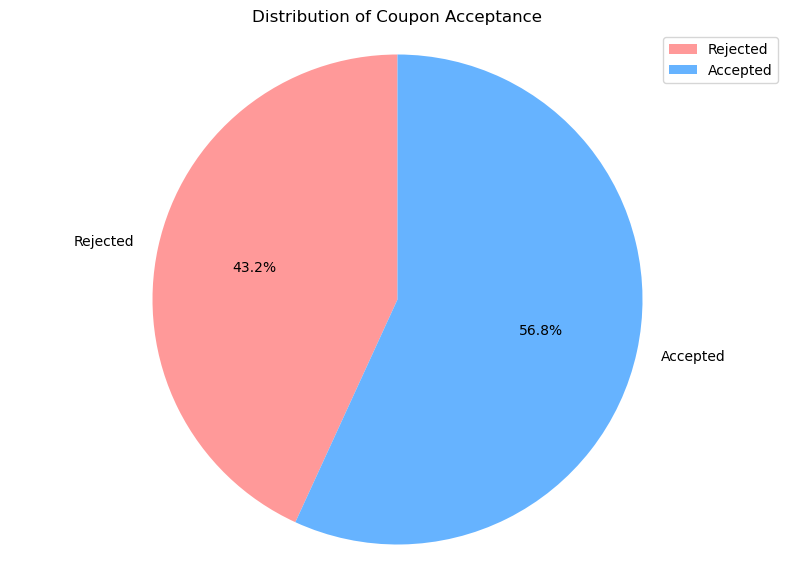

In [401]:
# Calculate the proportion of acceptances
total_observations = len(data)
acceptances = data['Y'].sum()
if total_observations != 0:
    proportion_accepted = acceptances / total_observations
    
#Create a Pie-Chart
# Count the occurrences of each value
value_counts = data['Y'].value_counts()

# Create labels for the pie chart
labels = ['Rejected', 'Accepted']
sizes = [value_counts.get(0, 0), value_counts.get(1, 0)]
colors = ['#ff9999', '#66b3ff']

# Create pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Distribution of Coupon Acceptance')
plt.legend(labels, loc="best")
file_path = '/Users/uday.kemburu/Documents/Berkley/PAA5_1/images/q4_pie_chart.png'

# Save the figure
plt.savefig(file_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
#Percentage of coupon acceptances: 56.84%

5. Use a bar plot to visualize the `coupon` column.

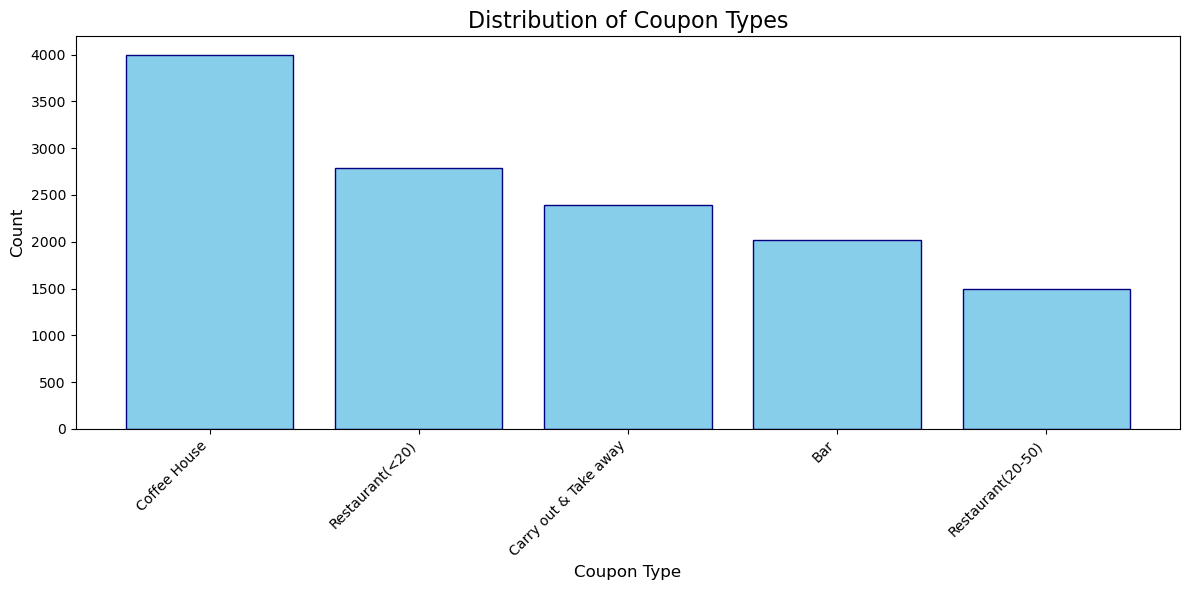

In [358]:
# Count the occurrences of each coupon type
coupon_counts = data['coupon'].value_counts()

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(coupon_counts.index, coupon_counts.values, color='skyblue', edgecolor='navy')

# Customize the plot
plt.title('Distribution of Coupon Types', fontsize=16)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

file_path = '/Users/uday.kemburu/Documents/Berkley/PAA5_1/images/q5_coupon_bar_plot.png'

# Save the figure
plt.savefig(file_path, dpi=300, bbox_inches='tight')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

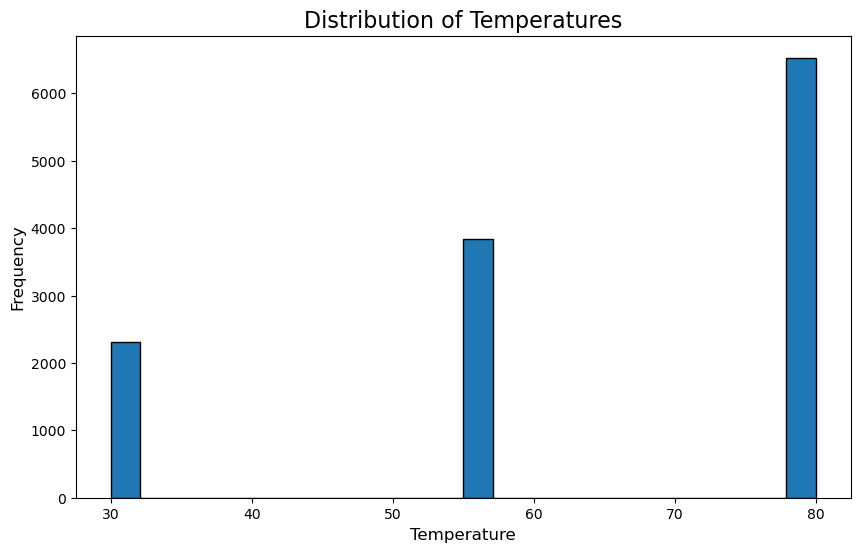

In [360]:


# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins='auto', edgecolor='black')

# Name the plot
plt.title('Distribution of Temperatures', fontsize=16)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

file_path = '/Users/uday.kemburu/Documents/Berkley/PAA5_1/images/q6_histogram_temperature_plot.png'

# Save the figure
plt.savefig(file_path, dpi=300, bbox_inches='tight')

plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [273]:
bar_coupons_df = data[data['coupon'] == 'Bar']
print(len(bar_coupons_df))


2017


2. What proportion of bar coupons were accepted?


In [269]:
# Calculate the proportion of acceptances
total_observations = len(bar_coupons_df)
acceptances = bar_coupons_df['Y'].sum()
if total_observations != 0:
    proportion_accepted = acceptances / total_observations
    

Percentage of acceptances: 41.03%


In [403]:
#Percentage of bar coupons acceptances: 41.03%

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [405]:
#Acceptance rate of Bar Coupon of those who went to a bar 3 or fewer times a month
bar_coupons_fewer_visits = bar_coupons_df[bar_coupons_df['Bar'].isin(['1~3', 'less1'])]
total_observations = len(bar_coupons_fewer_visits)
acceptances = bar_coupons_fewer_visits['Y'].sum()
if total_observations != 0:
    proportion_accepted = acceptances / total_observations
    

#Acceptance rate of Bar Coupon of those who went to a bar3 or more than times a month
bar_coupons_frequent_visits = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])]
total_observations = len(bar_coupons_frequent_visits)
acceptances = bar_coupons_frequent_visits['Y'].sum()
if total_observations != 0:
    proportion_accepted = acceptances / total_observations
    

In [ ]:
#Frequency of bar visits:

#Those who visit bars more frequently (>3 times a month) have a significantly higher acceptance rate (76.88%) 
#compared to less frequent visitors (≤3 times a month, 52.74%).
#This suggests that regular bar-goers are more likely to use coupons, possibly due to their higher interest in bar experiences.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [407]:
# Acceptance rate of Bar Coupons drivers who go to a bar more than once a month and are over the age of 25
frequent_bar_adults = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (~bar_coupons_df['age'].isin(['21', 'below21']))
]

total_observations = len(frequent_bar_adults)
acceptances = frequent_bar_adults['Y'].sum()
if total_observations != 0:
    proportion_accepted = acceptances / total_observations
   
#Acceptance rate of Bar Coupons drivers who go to a bar less than/never once month and are under the age of 25
infrequent_bar_under25 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['less1', 'never'])) & 
    (bar_coupons_df['age'].isin(['21', 'below21']))
]

total_observations = len(infrequent_bar_under25)
acceptances = infrequent_bar_under25['Y'].sum()
if total_observations != 0:
    proportion_accepted = acceptances / total_observations
   

In [ ]:
#Age and frequency of visits:

    #Drivers over 25 who visit bars more than once a month have a higher acceptance rate (69.52%) 
    #compared to those under 25 who visit less than once a month (39.45%).

    #This indicates that age and visit frequency together play a role in coupon acceptance, 
    #with older, more frequent visitors being more receptive.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [281]:
#Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid 
#and had occupations other than farming, fishing, or forestry. 
bar_freq_urban_passenger_df = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8']))&
                                            (bar_coupons_df['passanger'].isin(['Friend(s)', 'Partner']))&
                                            (~bar_coupons_df['occupation'].isin(['Farming Fishing & Forestry']))]

total_observations = len(bar_freq_urban_passenger_df)
acceptances = bar_freq_urban_passenger_df['Y'].sum()
if total_observations != 0:
    proportion_accepted = acceptances / total_observations
    print(f"Acceptance rate of Bar Coupons of Urban Younger Population who go to bar frequently: {proportion_accepted * 100:.2f}%")

#Acceptance rate between drivers other than the above criteria
bar_freq_rural_kid_df = bar_coupons_df[(~bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8']))&
                                            (bar_coupons_df['passanger'].isin(['Kid(s)','Alone']))&
                                            (bar_coupons_df['occupation'].isin(['Farming Fishing & Forestry']))]

total_observations = len(bar_freq_rural_kid_df)
acceptances = bar_freq_rural_kid_df['Y'].sum()
if total_observations != 0:
    proportion_accepted = acceptances / total_observations
    print(f"Acceptance rate of Bar Coupons of Rural  Population who go to bar infrequently: {proportion_accepted * 100:.2f}%")


Acceptance rate of Bar Coupons of Urban Younger Population who go to bar frequently: 71.79%
Acceptance rate of Bar Coupons of Rural  Population who go to bar infrequently: 50.00%


In [ ]:
#Urban vs. Rural and frequency:

    #Urban, younger, frequent bar visitors have a much higher acceptance rate (71.79%) 
    #compared to rural, infrequent visitors (50.00%).

    #This suggests that urban youth who frequently visit bars are more likely to use coupons, 
    #possibly due to lifestyle differences or greater exposure to bar culture.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [409]:
# (1) drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar_freq_1 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8']))& (~(bar_coupons_df['passanger'].isin(['Kid(s)'])))&
(~bar_coupons_df['maritalStatus'].isin(['Widowed']))]

# (2)drivers who go to bars more than once a month and are under the age of 30
bar_freq_2 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8']))&
(bar_coupons_df['age'].isin(['21', '26', 'below21']))]

# (3)drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.
bar_freq_3 = bar_coupons_df[(bar_coupons_df['RestaurantLessThan20'].isin(['4~8','gt8']))&
(bar_coupons_df['income'].isin(['$25000 - $37499  ', '$12500 - $24999', '$37500 - $49999']))]

# Drivers who meet (1) OR (2) OR (3)
bar_coupons_criteria_6 = pd.concat([bar_freq_1, bar_freq_2, bar_freq_3], ignore_index=True).drop_duplicates()

total_observations = len(bar_coupons_criteria_6)
acceptances = bar_coupons_criteria_6['Y'].sum()
if total_observations != 0:
    proportion_accepted = acceptances / total_observations
    

# Drivers who do not meet any of these criteria.

# (1) drivers who go to bars less than once a month, had passengers that were  a kid, and were  widowed

bar_freq_1 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['less1']))& ((bar_coupons_df['passanger'].isin(['Kid(s)'])))&
(bar_coupons_df['maritalStatus'].isin(['Widowed']))]

# (2)drivers who go to bars less than once a month and are over the age of 30

bar_freq_2 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['less1']))&
(~(bar_coupons_df['age'].isin(['21', '26', 'below21'])))]

# (3)drivers who do not go to cheap restaurants more than 4 times a month and income is more than 50K.
bar_freq_3 = bar_coupons_df[(~(bar_coupons_df['RestaurantLessThan20'].isin(['4~8','gt8'])))&
(~(bar_coupons_df['income'].isin(['$25000 - $37499  ', '$12500 - $24999', '$37500 - $49999'])))]

# Drivers who meet (1) OR (2) OR (3)
bar_coupons_criteria_not_6 = pd.concat([bar_freq_1, bar_freq_2, bar_freq_3], ignore_index=True).drop_duplicates()

total_observations = len(bar_coupons_criteria_not_6)
acceptances = bar_coupons_criteria_not_6['Y'].sum()
if total_observations != 0:
    proportion_accepted = acceptances / total_observations
    


In [ ]:
#Acceptance rate of Bar Coupons of drivers who meet criteria 6: 64.31%
#Acceptance rate of Bar Coupons of drivers who does NOT meet criteria 6: 40.19%

#Observation:Even among lower-income groups, those who visit bars frequently demonstrate a higher 
#coupon acceptance rate.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [362]:
# Summary of Bar Coupon Acceptance Rate:
#
# 1) Regular bar-goers are more inclined to accept bar coupons compared to infrequent visitors, 
#    suggesting a correlation between bar visit frequency and coupon acceptance likelihood.
#
# 2) Young urban adults (approximately 25 years old) who frequently visit bars show a higher 
#    acceptance rate than their rural counterparts who visit bars less often.
#
# 3) Even among lower-income groups, those who visit bars frequently demonstrate a higher 
#    coupon acceptance rate.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [287]:
#Create a new `DataFrame` that contains just the bar coupons.
coffee_house_coupons_df = data[data['coupon'] == 'Coffee House']


3996


In [289]:
# Calculate the proportion of acceptances
total_observations = len(coffee_house_coupons_df)
acceptances = coffee_house_coupons_df['Y'].sum()
if total_observations != 0:
    proportion_accepted = acceptances / total_observations
    

Percentage of acceptances: 49.92%


In [ ]:
#Percentage of Coffee House Coupon acceptances: 49.92%



In [411]:
# direction_same vs direction_opp
# Drivers who accept coffee house coupons while driving in the morning and the coupon is valid in the same direction and coupon expiration is 2h
coffee_coupon_same_direction = coffee_house_coupons_df[(coffee_house_coupons_df['direction_same'] == 1)&
                                                        (coffee_house_coupons_df['expiration'] == '2h')&
                                                        (coffee_house_coupons_df['time'].isin(['7AM', '10AM']) )]

total_observations = len(coffee_coupon_same_direction)
print(total_observations)
acceptances = coffee_coupon_same_direction['Y'].sum()

if total_observations != 0:
    proportion_accepted = acceptances / total_observations
    print(f"Accepted coffee house coupons 2h expiration in the same direction: {proportion_accepted * 100:.2f}%")

# Drivers who accept coffee house coupons while driving in the morning and the coupon is valid in the opposite direction and coupon expiration is 2h
coffee_coupon_opp_direction = coffee_house_coupons_df[(coffee_house_coupons_df['direction_opp'] == 1) &
                                                       (coffee_house_coupons_df['expiration'] == '2h')&
                                                        (coffee_house_coupons_df['time'].isin(['7AM', '10AM']) )]

total_observations = len(coffee_coupon_opp_direction)
print(total_observations)
acceptances = coffee_coupon_opp_direction['Y'].sum()

if total_observations != 0:
    proportion_accepted = acceptances / total_observations
    print(f"Accepted coffee house coupons 2h expiration in the opp direction: {proportion_accepted * 100:.2f}%")

233
Accepted coffee house coupons 2h expiration in the same direction: 47.21%
920
Accepted coffee house coupons 2h expiration in the opp direction: 49.67%


In [ ]:

#Accepted coffee house coupons 2h expiration in the same direction: 47.21% (total acceptances 233)

#Accepted coffee house coupons 2h expiration in the opp direction: 49.67% (total acceptances 920)

In [413]:
#Acceptance rate of CoffeeHouse Coupon of those who went to a CoffeeHouse 3 or fewer times a month
coffee_coupons_fewer_visits = coffee_house_coupons_df[coffee_house_coupons_df['CoffeeHouse'].isin(['1~3', 'less1'])]
total_observations = len(coffee_coupons_fewer_visits)
acceptances = coffee_coupons_fewer_visits['Y'].sum()

if total_observations != 0:
    proportion_accepted = acceptances / total_observations
    


#Acceptance rate of CoffeeHouse Coupon of those who went to a CoffeeHouse more 3 than times a month
coffee_coupons_frequent_visits = coffee_house_coupons_df[coffee_house_coupons_df['CoffeeHouse'].isin(['4~8', 'gt8'])]
total_observations = len(coffee_coupons_frequent_visits)
acceptances = coffee_coupons_frequent_visits['Y'].sum()

if total_observations != 0:
    proportion_accepted = acceptances / total_observations
    

In [ ]:
#Acceptance rate of CoffeeHouse Coupon of those who went to a CoffeeHouse 3 or fewer times a month: 56.35%
#Acceptance rate of CoffeeHouse Coupon of those who went to CoffeeHouse bar more than3 times a month: 67.50%

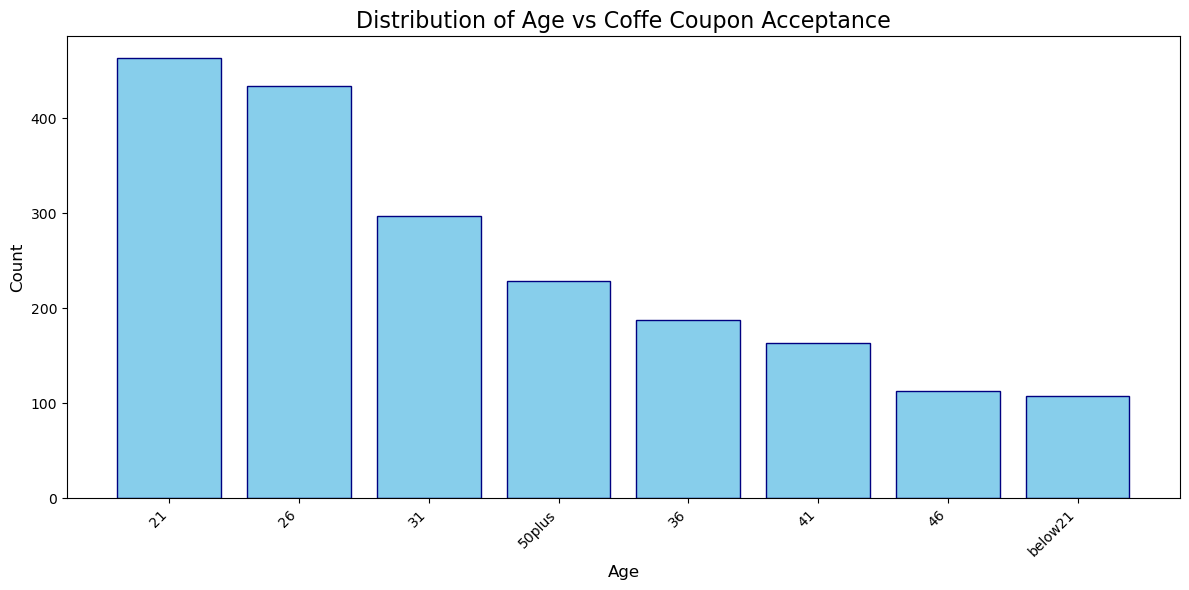

In [385]:

# Distribution of Age vs Coffe Coupon Acceptance
coffee_coupon_accepeted= coffee_house_coupons_df[(coffee_house_coupons_df['Y'] == 1)]
coupon_counts = coffee_coupon_accepeted['age'].value_counts()

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(coupon_counts.index, coupon_counts.values, color='skyblue', edgecolor='navy')

# Label X and Y Axis
plt.title('Distribution of Age vs Coffe Coupon Acceptance', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

file_path = '/Users/uday.kemburu/Documents/Berkley/PAA5_1/images/independent_histogram_coffecoupon_age_plot.png'

# Save the figure
plt.savefig(file_path, dpi=300, bbox_inches='tight')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

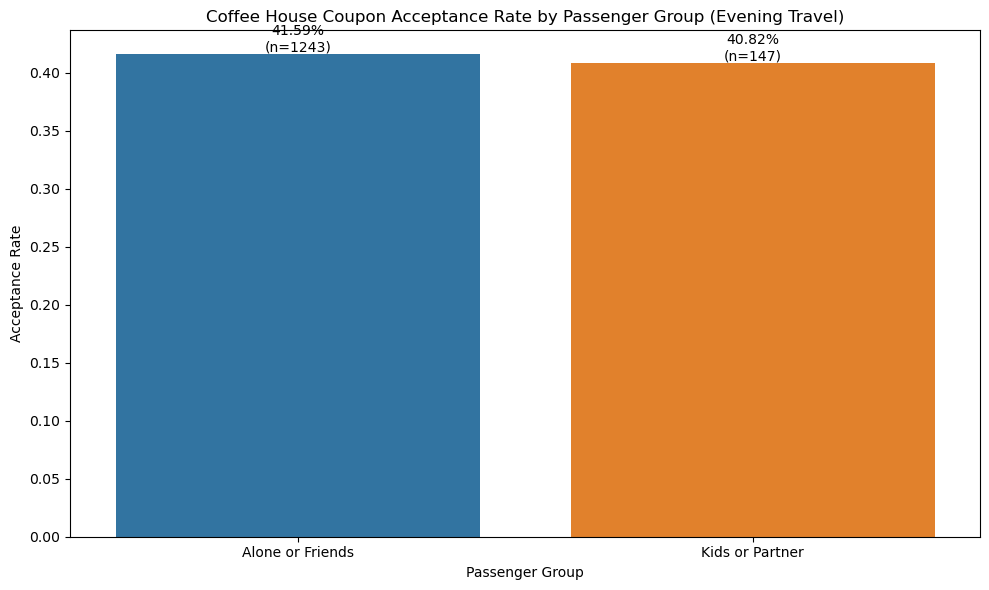

In [419]:
# Coffee House Coupon Acceptance Rate by Passenger Group (Evening Travel)
# Filter for coffee house coupons and evening travel
coffee_coupons_evening = coffee_house_coupons_df[((coffee_house_coupons_df['time'] == '6PM')|(coffee_house_coupons_df['time'] == '10PM'))]

# make a copy of the original data frame.
coffee_coupons_evening_copy = coffee_coupons_evening.copy()

# Create passenger groups
coffee_coupons_evening_copy['passenger_group'] = coffee_coupons_evening_copy['passanger'].apply(lambda x: 'Alone or Friends' if x in ['Alone', 'Friend(s)'] else 'Kids or Partner')

# Calculate acceptance rates for each group
acceptance_rates = coffee_coupons_evening_copy.groupby('passenger_group')['Y'].agg(['mean', 'count']).reset_index()
acceptance_rates.columns = ['passenger_group', 'acceptance_rate', 'count']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_group', y='acceptance_rate', data=acceptance_rates)

plt.title('Coffee House Coupon Acceptance Rate by Passenger Group (Evening Travel)')
plt.xlabel('Passenger Group')
plt.ylabel('Acceptance Rate')

# Add value labels on top of each bar
for i, row in acceptance_rates.iterrows():
    plt.text(i, row['acceptance_rate'], f'{row["acceptance_rate"]:.2%}\n(n={row["count"]})', 
             ha='center', va='bottom')
file_path = '/Users/uday.kemburu/Documents/Berkley/PAA5_1/images/independent_PassengerGroupEveningTravel_plot.png'

# Save the figure
plt.savefig(file_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()



In [ ]:
# Summary and Analysis of Coffee House Coupon Acceptance Patterns:

# 1. Coupon Expiration and Direction:
#    - 2h expiration, same direction: 47.21% acceptance
#    - 2h expiration, opposite direction: 49.67% acceptance
#    Analysis: The slight increase in acceptance for opposite direction suggests that
#    direction has minimal impact on short-term (2h) coupon acceptance. People might
#    be willing to change their route slightly for a coffee opportunity.

# 2. Frequency of Coffee House Visits:
#    - ≤3 times a month: 56.35% acceptance
#    - >3 times a month: 67.50% acceptance
#    Analysis: Regular coffee house patrons are significantly more likely to accept
#    coupons. This indicates that targeting frequent visitors could be a more
#    effective strategy for coupon campaigns.

# 3. Age Factor:
#    - Higher acceptance rate among younger people (age 21-31)
#    Analysis: This suggests that younger adults are more responsive to coffee house
#    coupons. This could be due to factors like social habits, budget-consciousness,
#    or greater engagement with mobile coupon platforms.

# 4. Evening Travel and Companionship:
#    - Higher acceptance count and slightly higher percentage for those traveling
#      alone or with friends compared to those with kids or partners
#    Analysis: Evening coffee consumption seems more appealing to individuals alone
#    or with friends. This might reflect different evening routines or social habits
#    between these groups.

# Overall Analysis:
# - Frequency of visits is the strongest predictor of coupon acceptance, suggesting
#   loyalty programs or targeted marketing to regular customers could be effective.
# - Age plays a significant role, indicating that tailoring campaigns to younger
#   adults might yield better results.
# - The time of day and travel companionship affect decisions, with evening solo or
#   friend outings being more conducive to coffee purchases.
# - The direction of travel has minimal impact, suggesting that the convenience of
#   the coffee shop location might be less important than other factors.

# Recommendations:
# 1. Focus marketing efforts on frequent visitors and younger adults.
# 2. Consider targeting evening travelers, especially those alone or with friends.
# 3. Experiment with coupon expiration times, as the 2-hour window seems effective
#    regardless of direction.
# 4. Develop strategies to convert less frequent visitors into regular patrons,
#    as they show a significant increase in coupon acceptance.